In [1]:
# Install python package for cassandra:
!pip install cassandra-driver polars matplotlib

DEPRECATION: Loading egg at /opt/bitnami/python/lib/python3.11/site-packages/pip-23.3.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 4.3 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 97.9/97.9 kB 5.6 MB/s eta 0:00:00


In [ ]:
%load_ext autoreload
%autoreload 2


In [1]:
from opensea_monitoring.www.backend.client import OpenSeaDataMonitoringClient

client = OpenSeaDataMonitoringClient(default_keyspace="opensea")

In [2]:
metric_name = "transfers_count"
grain = "1 minute"
plot_name = f"{metric_name} ({grain})"
print(plot_name)

transfers_count (1 minute)


In [3]:
results = client.get_global_metrics(
    metric=metric_name, grain=grain, order_ascending=True
)
len(results)

419

In [4]:
import polars as pl
from matplotlib import pyplot as plt

In [5]:
results_df = pl.DataFrame(
    map(dict, results),
    schema={
        "metric":pl.String(),
        "timestamp_at":pl.Datetime(),
        "value":pl.Float64(),
        "collection":pl.String()
    }
)

In [6]:
results_df.describe()

statistic,metric,timestamp_at,value,collection
str,str,str,f64,str
"""count""","""419""","""419""",419.0,"""0"""
"""null_count""","""0""","""0""",0.0,"""419"""
"""mean""",null,"""2024-07-20 17:21:30""",377.114558,null
"""std""",null,null,305.798212,null
"""min""","""transfers_count__1_minute""","""2024-07-20 15:37:00""",15.0,null
"""25%""",null,"""2024-07-20 16:29:30""",207.0,null
"""50%""",null,"""2024-07-20 17:21:30""",273.0,null
"""75%""",null,"""2024-07-20 18:14:00""",378.0,null
"""max""","""transfers_count__1_minute""","""2024-07-20 19:06:00""",1709.0,null


(array([[ 37., 130.,  49.,   8.,  17.,  13.,   7.,  12.,   6.,   2.],
        [281.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.0000e+00, 1.7180e+02, 3.4260e+02, 5.1340e+02, 6.8420e+02,
        8.5500e+02, 1.0258e+03, 1.1966e+03, 1.3674e+03, 1.5382e+03,
        1.7090e+03]),
 <a list of 2 BarContainer objects>)

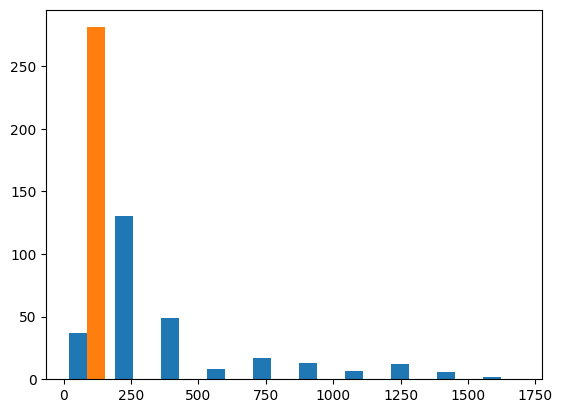

In [7]:
# See distribution of the value column:
plt.hist(results_df["value"].value_counts())

(array([[ 37., 130.,  49.,   8.,  17.,  13.,   7.,  12.,   6.,   2.],
        [281.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([1.0000e+00, 1.7180e+02, 3.4260e+02, 5.1340e+02, 6.8420e+02,
        8.5500e+02, 1.0258e+03, 1.1966e+03, 1.3674e+03, 1.5382e+03,
        1.7090e+03]),
 <a list of 2 BarContainer objects>)

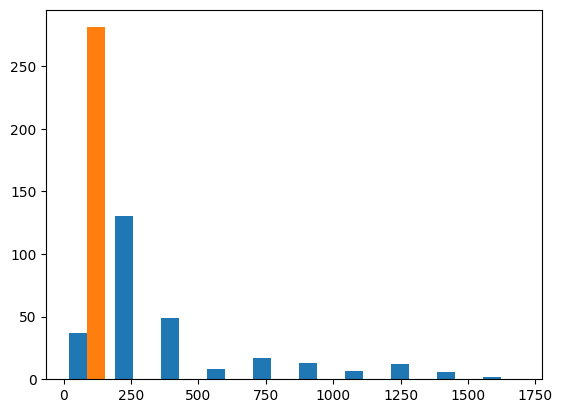

In [8]:
# See distribution of the value column:
plt.hist(results_df.filter(results_df["value"]<2000)["value"].value_counts())

In [12]:
results_df

metric,timestamp_at,value,collection
str,datetime[μs],f64,str
"""transfers_count__1_minute""",2024-07-20 15:37:00,15.0,null
"""transfers_count__1_minute""",2024-07-20 15:37:30,600.0,null
"""transfers_count__1_minute""",2024-07-20 15:38:00,1190.0,null
"""transfers_count__1_minute""",2024-07-20 15:38:30,778.0,null
"""transfers_count__1_minute""",2024-07-20 15:39:00,364.0,null
…,…,…,…
"""transfers_count__1_minute""",2024-07-20 19:04:00,138.0,null
"""transfers_count__1_minute""",2024-07-20 19:04:30,126.0,null
"""transfers_count__1_minute""",2024-07-20 19:05:00,84.0,null


AttributeError: Line2D.set() got an unexpected keyword argument 'hue'

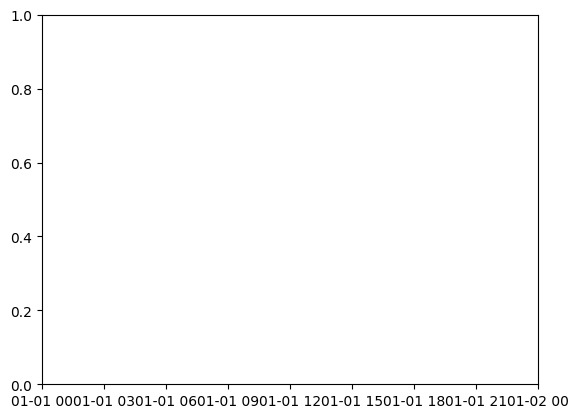

In [13]:
plot_results = results_df
# plot_results = results_df.filter(results_df["value"]<2000)
plt.plot(plot_results["timestamp_at"], plot_results["value"], hue=plot_results["metric"])
# Set plot name:
plt.title(plot_name)
plt.show()

In [10]:
client.get_collection_metrics()

[]

In [11]:
results_df["metric"].value_counts()

metric,count
str,u32
"""transfers_count__1_minute""",419
